<a href="https://colab.research.google.com/github/amitkrjha1994/Cotton-Disease-Detection-Using-CNN/blob/main/Cotton_Disease_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model,Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D

In [10]:
train_data_dir='/content/drive/My Drive/Colab Notebooks/Cotton Disease Pridiction/train'
test_data_dir='/content/drive/My Drive/Colab Notebooks/Cotton Disease Pridiction/val'

In [11]:
IMAGE_SIZE=[224,224]
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory(train_data_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [13]:
test_set=test_datagen.flow_from_directory(test_data_dir,target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 324 images belonging to 4 classes.


In [14]:
from keras.preprocessing.image import load_img,img_to_array


Text(0.5, 1.0, 'Diseased Image')

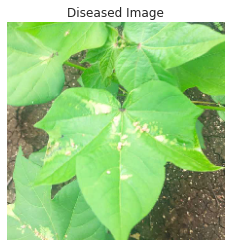

In [15]:
image_path='/content/drive/My Drive/Colab Notebooks/Cotton Disease Pridiction/train/diseased cotton leaf/dis_leaf (1)_iaip.jpg'
new_img = load_img(image_path, target_size=(224, 224))
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title("Diseased Image")

Text(0.5, 1.0, 'Fresh Leaf')

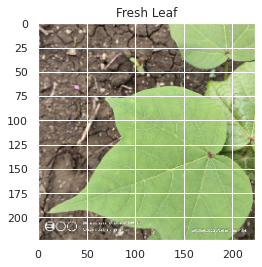

In [16]:
fresh_img='/content/drive/My Drive/Colab Notebooks/Cotton Disease Pridiction/train/fresh cotton leaf/d (10)_iaip.jpg'
new_img=load_img(fresh_img,target_size=(224,224))
plt.figure(figsize=(4,4))
plt.imshow(new_img)
plt.title("Fresh Leaf")

In [17]:
model=Sequential()

In [18]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [20]:
from keras import layers

In [21]:
model.add(Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 173056)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [22]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
history=model.fit_generator(training_set,
                    validation_data=test_set,
                    epochs=10,
                    steps_per_epoch=len(training_set),
                    validation_steps=len(test_set))

Epoch 1/10
122/122 [==============================] - 34s 276ms/step - loss: 0.3481 - accuracy: 0.8683 - val_loss: 0.4470 - val_accuracy: 0.8302
Epoch 2/10
122/122 [==============================] - 34s 279ms/step - loss: 0.3572 - accuracy: 0.8447 - val_loss: 0.4269 - val_accuracy: 0.8395
Epoch 3/10
122/122 [==============================] - 34s 275ms/step - loss: 0.2624 - accuracy: 0.8913 - val_loss: 0.3658 - val_accuracy: 0.8673
Epoch 4/10
122/122 [==============================] - 34s 275ms/step - loss: 0.2867 - accuracy: 0.8908 - val_loss: 0.5350 - val_accuracy: 0.8148
Epoch 5/10
122/122 [==============================] - 34s 276ms/step - loss: 0.2338 - accuracy: 0.9103 - val_loss: 0.4729 - val_accuracy: 0.8148
Epoch 6/10
122/122 [==============================] - 33s 273ms/step - loss: 0.2094 - accuracy: 0.9175 - val_loss: 0.3619 - val_accuracy: 0.8858
Epoch 7/10
122/122 [==============================] - 34s 275ms/step - loss: 0.1991 - accuracy: 0.9216 - val_loss: 0.3645 - val_ac

In [24]:
model.save('/content/drive/My Drive/Colab Notebooks/Cotton Disease Pridiction/model.h5')

In [44]:
img_path='/content/drive/My Drive/Colab Notebooks/Cotton Disease Pridiction/test/diseased cotton leaf/dis_leaf (124).jpg'
img=load_img(img_path,target_size=(224,224))
x=img_to_array(img)
x.shape

(224, 224, 3)

In [45]:
x=x/255

In [46]:
x.shape

(224, 224, 3)

In [47]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 224, 224, 3)

In [61]:
prediction=model.predict(x)

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [57]:
acc=history.history['accuracy']

In [58]:
val_acc = history.history['val_accuracy']

In [59]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

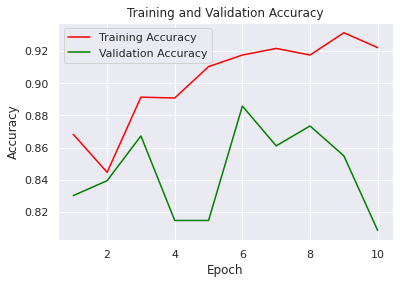

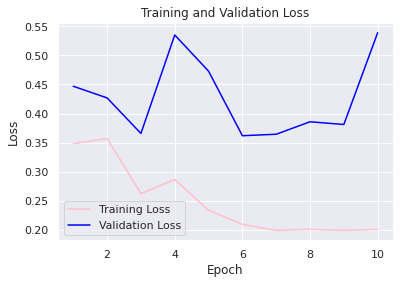

In [60]:
#accuracy plot
plt.plot(epochs, acc, color='red', label='Training Accuracy')
plt.plot(epochs, val_acc, color='green', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='blue', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [53]:
model.metrics_names

['loss', 'accuracy']

In [64]:
class_dict=training_set.class_indices
print(class_dict)
li=list(class_dict.keys())
print(li)

{'diseased cotton leaf': 0, 'diseased cotton plant': 1, 'fresh cotton leaf': 2, 'fresh cotton plant': 3}
['diseased cotton leaf', 'diseased cotton plant', 'fresh cotton leaf', 'fresh cotton plant']


In [65]:
d=prediction.flatten()
j=d.max()
print(j)

0.99989617


In [66]:
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]
print(class_name)

diseased cotton leaf


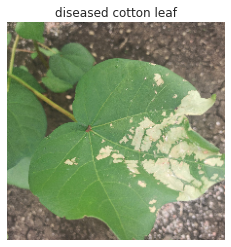

In [68]:
#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(img)
plt.axis('off')
plt.title(class_name)
plt.show()